### Random Forest per study

In [1]:
import os
# ========== STEP 0: Set working directory (for running locally on laptop) =========
os.getcwd()
os.chdir("/Users/adeslatt/Scitechcon Dropbox/Anne DeslattesMays/projects/oadr-autoantibody")
os.getcwd()

'/Users/adeslatt/Scitechcon Dropbox/Anne DeslattesMays/projects/oadr-autoantibody'


=== Training Random Forest for SDY569 ===
  MSE:        0.5322
  Median MSE: 0.2602
  IQR:        0.0257


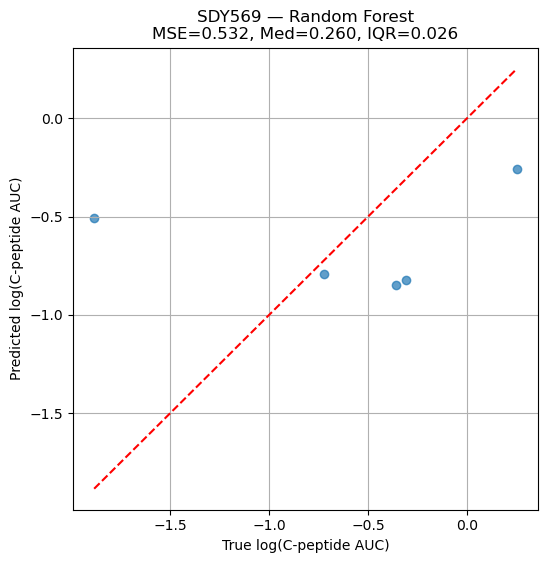


=== Training Random Forest for SDY797 ===
  MSE:        0.2417
  Median MSE: 0.0551
  IQR:        0.3715


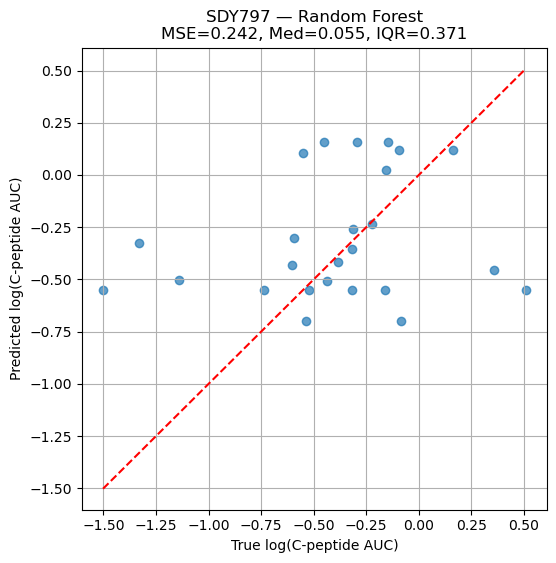


=== Training Random Forest for SDY1737 ===
  MSE:        0.5753
  Median MSE: 0.2308
  IQR:        0.5537


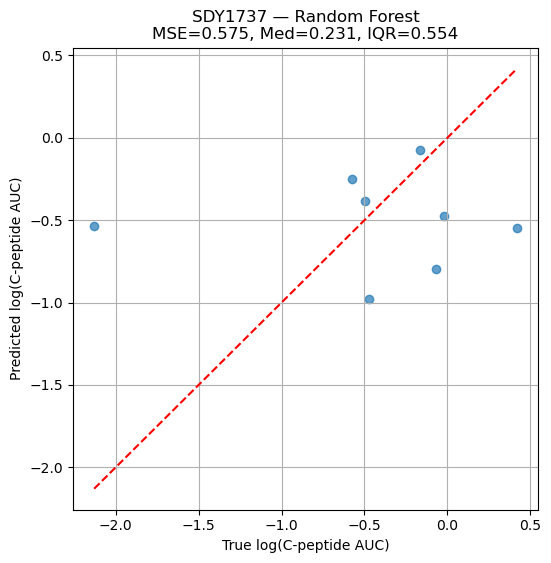

In [2]:
# RandomForest_Local_PerStudy.ipynb

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Setup
studies = ["SDY569", "SDY797", "SDY1737"]
standard_features = [
    "MIAA", "GAD65", "IA2IC", "ICA", "ZNT8",
    "8-12", "13-17", ">18", "Sex"
]

# Create output directories
os.makedirs("figures/pdf", exist_ok=True)
os.makedirs("figures/html", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("rf_results", exist_ok=True)  # New folder for saving objects

rf_results = {}

for study in studies:
    print(f"\n=== Training Random Forest for {study} ===")

    # --- Load Data ---
    df_train = pd.read_csv(f"data/cleaned/{study}_train.csv").fillna(0.0)
    df_test  = pd.read_csv(f"data/cleaned/{study}_test.csv").fillna(0.0)

    # Log-transform target
    df_train["log_auc"] = np.log(df_train["C_Peptide_AUC_4Hrs"])
    df_test["log_auc"]  = np.log(df_test["C_Peptide_AUC_4Hrs"])

    X_train = df_train[standard_features].values
    y_train = df_train["log_auc"].values
    X_test  = df_test[standard_features].values
    y_test  = df_test["log_auc"].values

    # --- Train Random Forest ---
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)

    # --- Predict ---
    y_pred = rf_model.predict(X_test)

    # --- Evaluate ---
    squared_errors = (y_test - y_pred) ** 2
    mse = mean_squared_error(y_test, y_pred)
    median_mse = np.median(squared_errors)
    iqr = np.percentile(squared_errors, 75) - np.percentile(squared_errors, 25)

    print(f"  MSE:        {mse:.4f}")
    print(f"  Median MSE: {median_mse:.4f}")
    print(f"  IQR:        {iqr:.4f}")

    # --- Store results for downstream use ---
    rf_results[study] = {
        "model": rf_model,
        "X_test": X_test,
        "y_test": y_test,
        "y_pred": y_pred,
        "feature_names": standard_features,
        "train_df": df_train,
        "test_df": df_test,
        "mse": mse,
        "median_mse": median_mse,
        "iqr": iqr
    }

    # --- Save to disk ---
    with open(f"rf_results/{study}_rf.pkl", "wb") as f:
        pickle.dump(rf_results[study], f)

    # --- Static Plot ---
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("True log(C‑peptide AUC)")
    plt.ylabel("Predicted log(C‑peptide AUC)")
    plt.title(f"{study} — Random Forest\nMSE={mse:.3f}, Med={median_mse:.3f}, IQR={iqr:.3f}")
    plt.grid(True)
    plt.savefig(f"figures/pdf/{study}_rf_local.pdf")
    plt.show()

    # --- Interactive Plot ---
    df_plot = pd.DataFrame({
        "True log(AUC)": y_test,
        "Predicted": y_pred
    })
    fig = px.scatter(
        df_plot, x="True log(AUC)", y="Predicted",
        title=f"{study} — Random Forest (Interactive)",
        width=600, height=600
    )
    fig.add_shape(
        type="line",
        x0=y_test.min(), y0=y_test.min(),
        x1=y_test.max(), y1=y_test.max(),
        line=dict(color="red", dash="dash")
    )
    fig.write_html(f"figures/html/{study}_rf_local.html")



--- Visualizations for SDY569 ---


/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/ipykernel_3753/1790697293.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




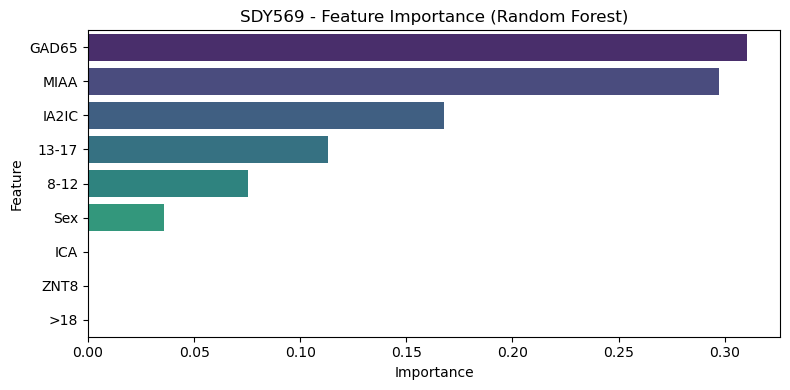

/Users/adeslatt/miniforge3/envs/springer-verlag/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/adeslatt/miniforge3/envs/springer-verlag/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



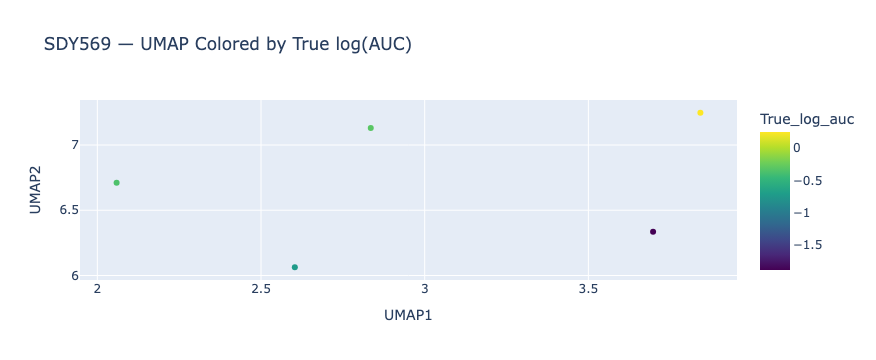

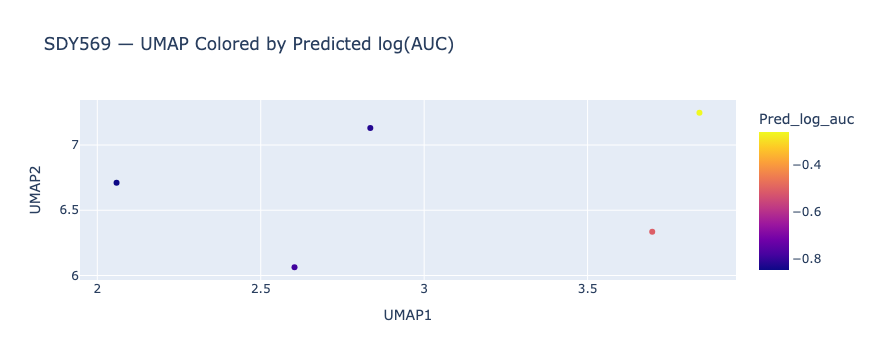

/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/ipykernel_3753/1790697293.py:77: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



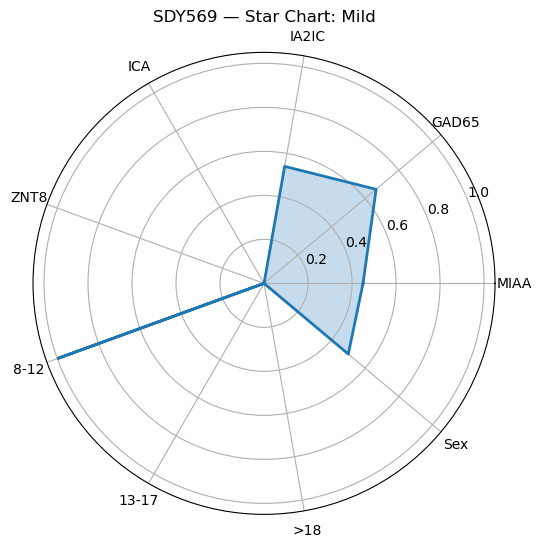

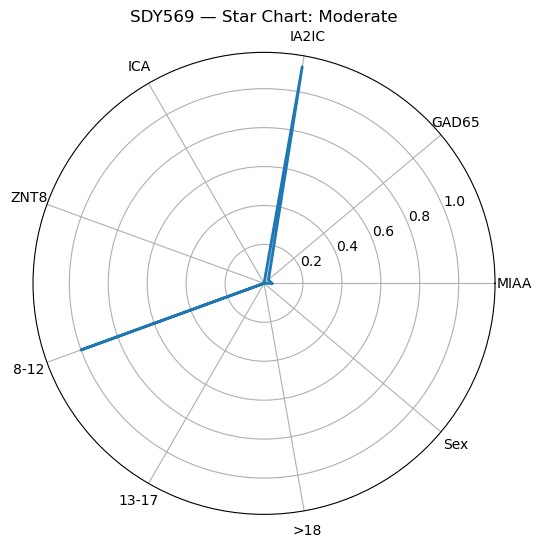

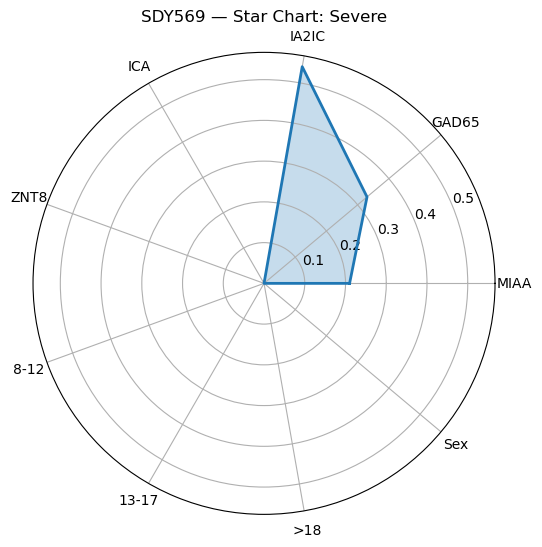

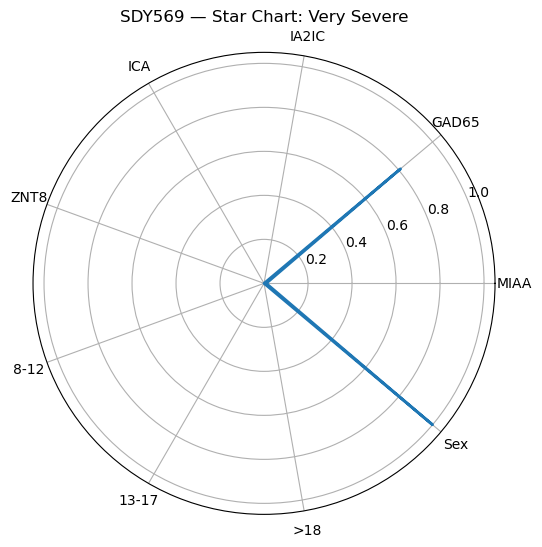


--- Visualizations for SDY797 ---


/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/ipykernel_3753/1790697293.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




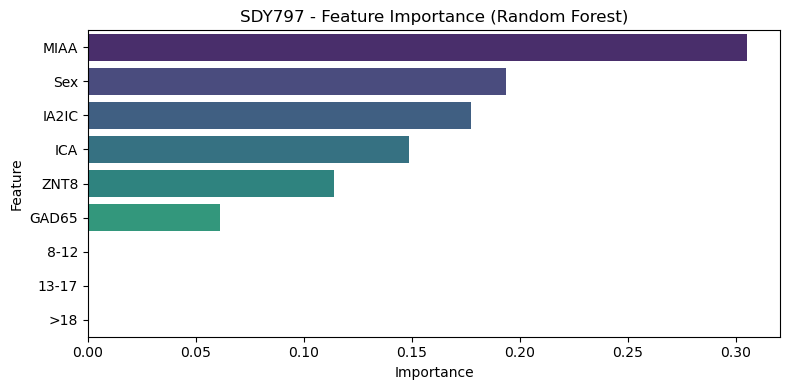

/Users/adeslatt/miniforge3/envs/springer-verlag/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



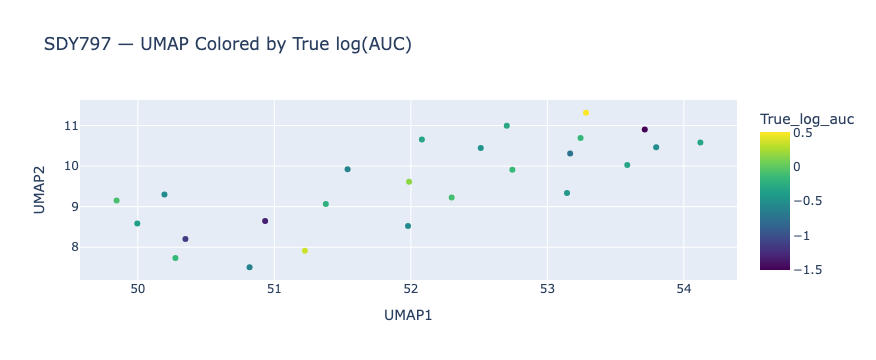

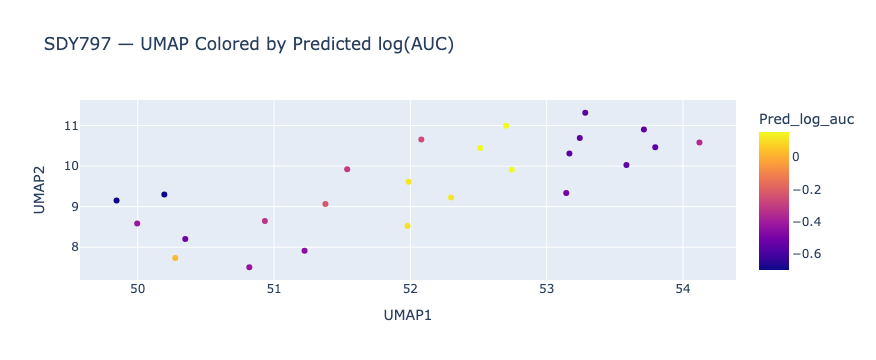

/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/ipykernel_3753/1790697293.py:77: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



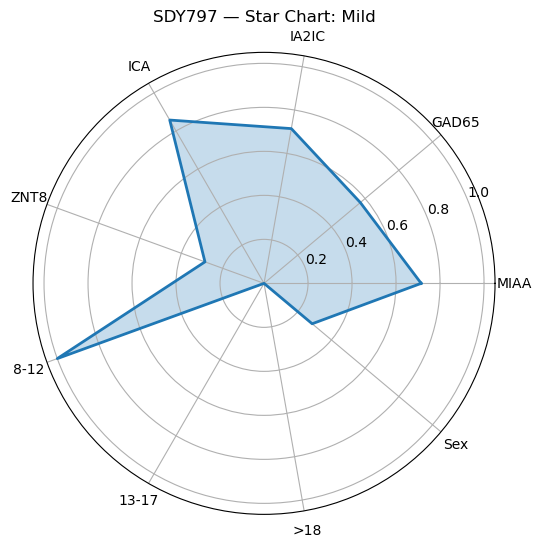

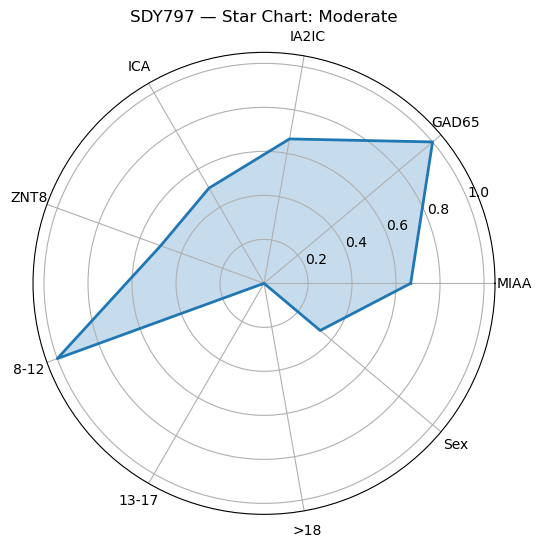

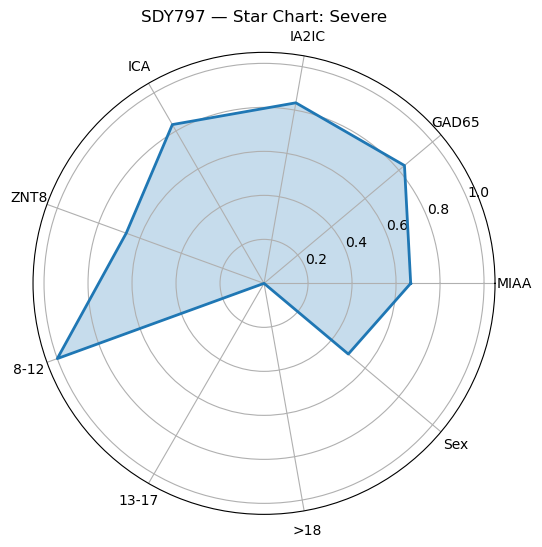

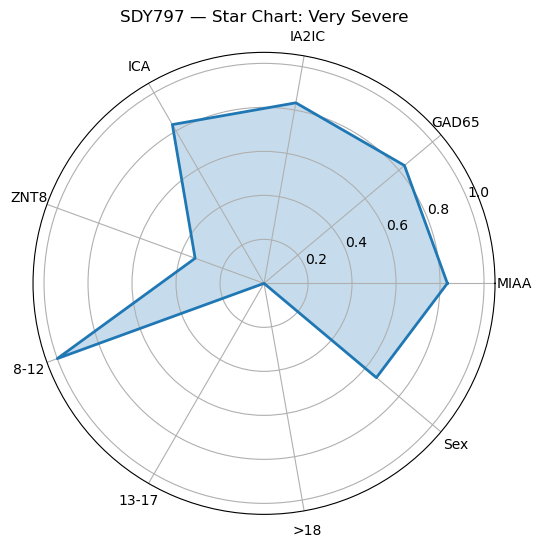


--- Visualizations for SDY1737 ---


/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/ipykernel_3753/1790697293.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




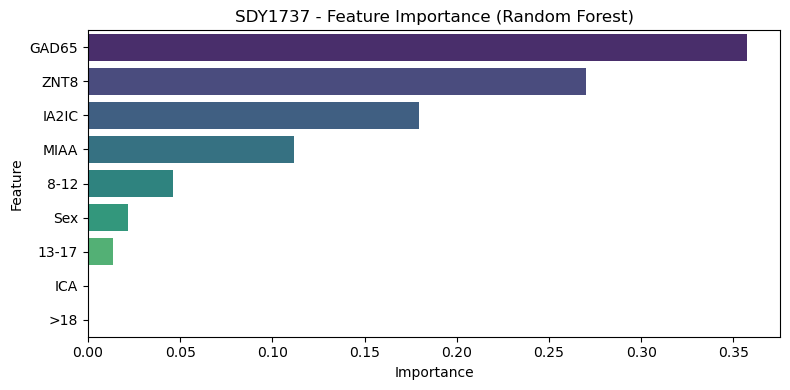

/Users/adeslatt/miniforge3/envs/springer-verlag/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/adeslatt/miniforge3/envs/springer-verlag/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



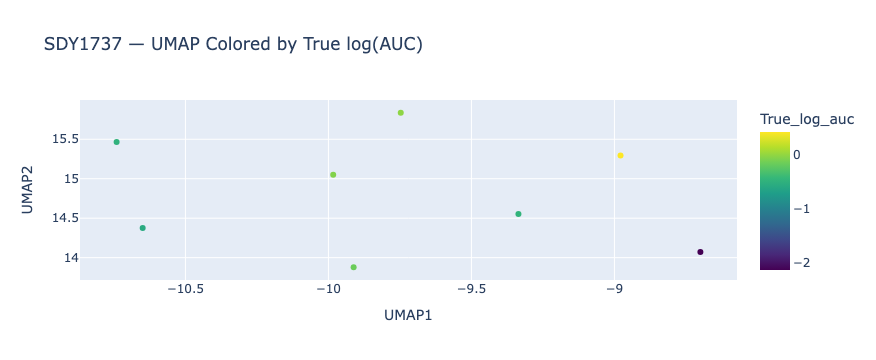

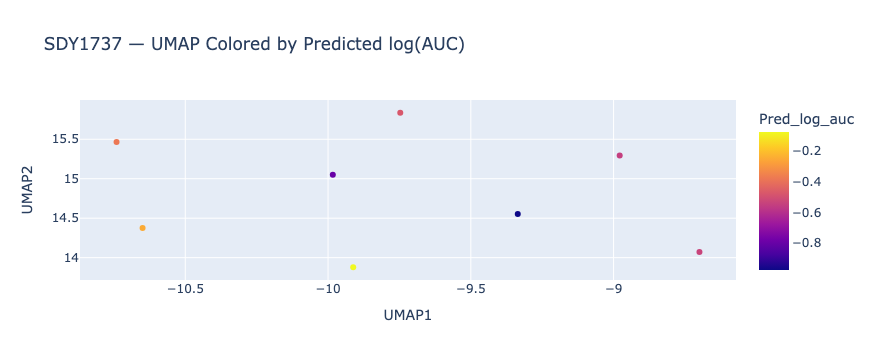

/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/ipykernel_3753/1790697293.py:77: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



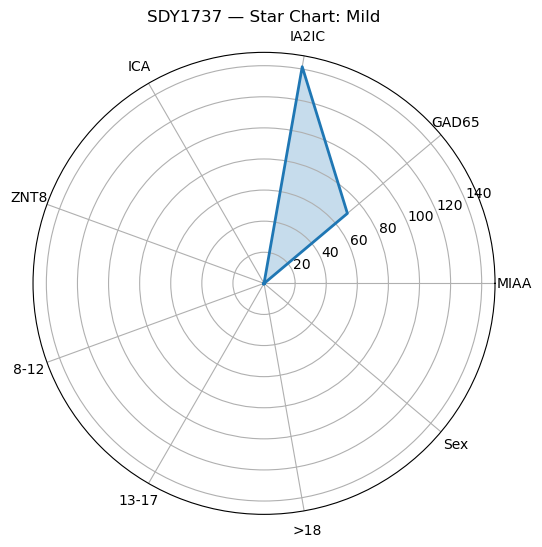

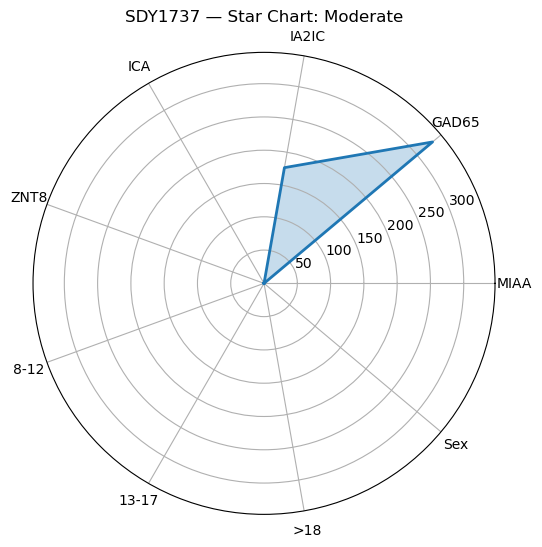

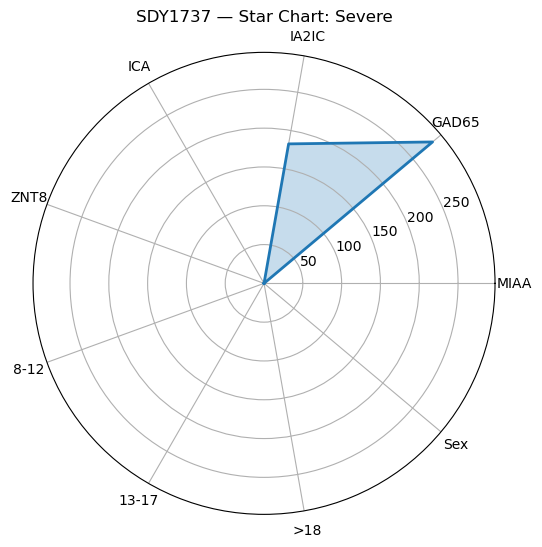

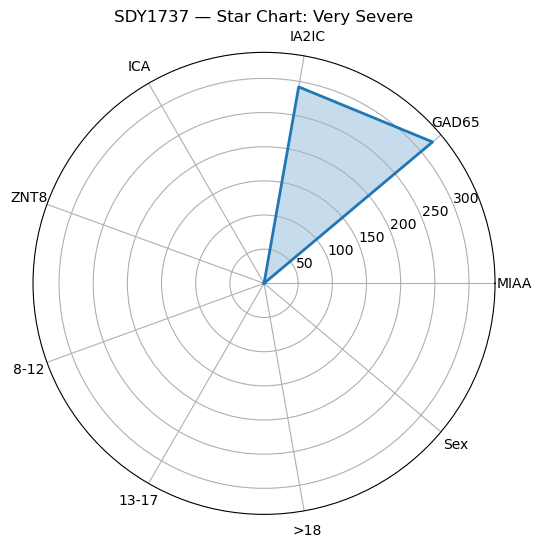

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import os
import seaborn as sns
import umap
from math import pi

# Ensure output dirs
os.makedirs("figures/umap", exist_ok=True)
os.makedirs("figures/star", exist_ok=True)
os.makedirs("figures/importance", exist_ok=True)
os.makedirs("figures/html", exist_ok=True)

standard_features = [
    "MIAA", "GAD65", "IA2IC", "ICA", "ZNT8",
    "8-12", "13-17", ">18", "Sex"
]

for study, result in rf_results.items():
    print(f"\n--- Visualizations for {study} ---")

    X_test = result["X_test"]
    y_test = result["y_test"]
    y_pred = result["y_pred"]
    df_meta = result["test_df"].copy()
    
    df_meta["True_log_auc"] = y_test
    df_meta["Pred_log_auc"] = y_pred

    # ============================
    # 1. Feature Importance Plot
    # ============================
    importances = result["model"].feature_importances_
    feat_df = pd.DataFrame({"Feature": standard_features, "Importance": importances})
    feat_df = feat_df.sort_values("Importance", ascending=False)

    plt.figure(figsize=(8, 4))
    sns.barplot(data=feat_df, x="Importance", y="Feature", palette="viridis")
    plt.title(f"{study} - Feature Importance (Random Forest)")
    plt.tight_layout()
    plt.savefig(f"figures/importance/{study}_feature_importance.pdf")
    plt.show()

    # ======================
    # 2. UMAP Visualizations
    # ======================
    reducer = umap.UMAP(random_state=42)
    umap_emb = reducer.fit_transform(X_test)

    df_umap = pd.DataFrame(umap_emb, columns=["UMAP1", "UMAP2"])
    df_umap["True_log_auc"] = y_test
    df_umap["Pred_log_auc"] = y_pred
    df_umap["Age_Group"] = df_meta[["8-12", "13-17", ">18"]].idxmax(axis=1)
    df_umap["Sex"] = df_meta["Sex"].map({0: "Male", 1: "Female"})

    fig1 = px.scatter(df_umap, x="UMAP1", y="UMAP2", color="True_log_auc",
                      title=f"{study} — UMAP Colored by True log(AUC)",
                      color_continuous_scale="Viridis")
    fig1.write_html(f"figures/html/{study}_umap_true.html")
    fig1.show()

    fig2 = px.scatter(df_umap, x="UMAP1", y="UMAP2", color="Pred_log_auc",
                      title=f"{study} — UMAP Colored by Predicted log(AUC)",
                      color_continuous_scale="Plasma")
    fig2.write_html(f"figures/html/{study}_umap_pred.html")
    fig2.show()

    # =====================
    # 3. Star Chart by Severity Bin
    # =====================
    # Bin by true log AUC into quartiles
    df_meta["SeverityBin"] = pd.qcut(df_meta["True_log_auc"], q=4, labels=["Mild", "Moderate", "Severe", "Very Severe"])
    
    group_means = df_meta.groupby("SeverityBin")[standard_features].mean()

    # Radar plot
    categories = list(group_means.columns)
    N = len(categories)

    for label, row in group_means.iterrows():
        values = row.values.tolist()
        values += values[:1]

        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        plt.figure(figsize=(6,6))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories)
        ax.plot(angles, values, linewidth=2, linestyle='solid')
        ax.fill(angles, values, alpha=0.25)
        plt.title(f"{study} — Star Chart: {label}")
        plt.savefig(f"figures/star/{study}_star_{label}.pdf")
        plt.show()


In [4]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
study="SDY1737"
# --- Load prediction results ---
result = rf_results[study]
df_meta = result["test_df"].copy()
df_meta["True_log_auc"] = result["y_test"]
df_meta["Pred_log_auc"] = result["y_pred"]

# --- Assign patient IDs if needed ---
df_meta.index = df_meta.get("Subject", [f"{study}_P{i}" for i in range(len(df_meta))])

for col in df_meta.columns:
    if df_meta[col].dropna().isin([True, False]).all():
        df_meta[col] = df_meta[col].astype(float)

for col in df_meta.columns:
    if df_meta[col].dropna().isin(["NaN"]).all():
        df_meta[col] = df_meta[col].astype(float)

# --- Ensure all columns are numeric (e.g., float or int) ---
df_meta = df_meta.apply(pd.to_numeric, errors="coerce")
display(df_meta)

# --- Subset endotype features (adjust as needed) ---
features = ["MIAA", "GAD65", "IA2IC", "ICA", "ZNT8", "8-12", "13-17", ">18", "Sex"]
heatmap_data = df_meta[features].copy()
display(heatmap_data)
display(heatmap_data.columns)

# --- Convert boolean-like columns to float (True/False → 1.0/0.0) ---
for col in heatmap_data.columns:
    if heatmap_data[col].dropna().isin([True, False]).all():
        heatmap_data[col] = heatmap_data[col].astype(float)

# --- Ensure all columns are numeric (e.g., float or int) ---
heatmap_data = heatmap_data.apply(pd.to_numeric, errors="coerce")
display(heatmap_data)

# --- Drop rows with any NaNs (just in case) ---
heatmap_data = heatmap_data.dropna()

df_meta = df_meta.loc[heatmap_data.index]


,Subject_ID,MIAA,GAD65,IA2IC,ICA,ZNT8,8-12,13-17,>18,Sex,C_Peptide_AUC_4Hrs,log_auc,True_log_auc,Pred_log_auc
SDY1737_P0,NaN,0.000,551.0,2.0,0.0,0.015,0.0,0.0,0.0,0.0,0.845705,-0.167585,-0.167585,-0.076494
SDY1737_P1,NaN,0.001,16.0,363.0,0.0,0.529,1.0,0.0,0.0,0.0,0.934406,-0.067844,-0.067844,-0.799073
SDY1737_P2,NaN,0.049,0.0,350.0,0.0,0.150,0.0,1.0,0.0,0.0,0.624090,-0.471460,-0.471460,-0.975494
SDY1737_P3,NaN,0.210,83.0,2.0,0.0,0.001,0.0,1.0,0.0,1.0,0.562028,-0.576204,-0.576204,-0.251453
SDY1737_P4,NaN,0.003,570.0,301.0,0.0,1.142,0.0,0.0,0.0,0.0,1.520736,0.419195,0.419195,-0.550136
SDY1737_P5,NaN,0.012,57.0,281.0,0.0,0.083,0.0,0.0,0.0,0.0,0.118850,-2.129896,-2.129896,-0.536002
SDY1737_P6,NaN,0.017,74.0,283.0,0.0,-0.010,1.0,0.0,0.0,1.0,0.980480,-0.019713,-0.019713,-0.475369
SDY1737_P7,NaN,0.007,661.0,3.0,0.0,0.173,0.0,0.0,0.0,1.0,0.610295,-0.493813,-0.493813,-0.381763


,MIAA,GAD65,IA2IC,ICA,ZNT8,8-12,13-17,>18,Sex
SDY1737_P0,0.000,551.0,2.0,0.0,0.015,0.0,0.0,0.0,0.0
SDY1737_P1,0.001,16.0,363.0,0.0,0.529,1.0,0.0,0.0,0.0
SDY1737_P2,0.049,0.0,350.0,0.0,0.150,0.0,1.0,0.0,0.0
SDY1737_P3,0.210,83.0,2.0,0.0,0.001,0.0,1.0,0.0,1.0
SDY1737_P4,0.003,570.0,301.0,0.0,1.142,0.0,0.0,0.0,0.0
SDY1737_P5,0.012,57.0,281.0,0.0,0.083,0.0,0.0,0.0,0.0
SDY1737_P6,0.017,74.0,283.0,0.0,-0.010,1.0,0.0,0.0,1.0
SDY1737_P7,0.007,661.0,3.0,0.0,0.173,0.0,0.0,0.0,1.0


Index(['MIAA', 'GAD65', 'IA2IC', 'ICA', 'ZNT8', '8-12', '13-17', '>18', 'Sex'], dtype='object')

,MIAA,GAD65,IA2IC,ICA,ZNT8,8-12,13-17,>18,Sex
SDY1737_P0,0.000,551.0,2.0,0.0,0.015,0.0,0.0,0.0,0.0
SDY1737_P1,0.001,16.0,363.0,0.0,0.529,1.0,0.0,0.0,0.0
SDY1737_P2,0.049,0.0,350.0,0.0,0.150,0.0,1.0,0.0,0.0
SDY1737_P3,0.210,83.0,2.0,0.0,0.001,0.0,1.0,0.0,1.0
SDY1737_P4,0.003,570.0,301.0,0.0,1.142,0.0,0.0,0.0,0.0
SDY1737_P5,0.012,57.0,281.0,0.0,0.083,0.0,0.0,0.0,0.0
SDY1737_P6,0.017,74.0,283.0,0.0,-0.010,1.0,0.0,0.0,1.0
SDY1737_P7,0.007,661.0,3.0,0.0,0.173,0.0,0.0,0.0,1.0



=== Generating heatmap for SDY569 ===
Saved PDF to outputs/pdfs/SDY569_heatmap.pdf

=== Generating heatmap for SDY797 ===


/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/ipykernel_3753/2386062073.py:50: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/ipykernel_3753/2386062073.py:50: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



Saved PDF to outputs/pdfs/SDY797_heatmap.pdf

=== Generating heatmap for SDY1737 ===


/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/ipykernel_3753/2386062073.py:50: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



Saved PDF to outputs/pdfs/SDY1737_heatmap.pdf


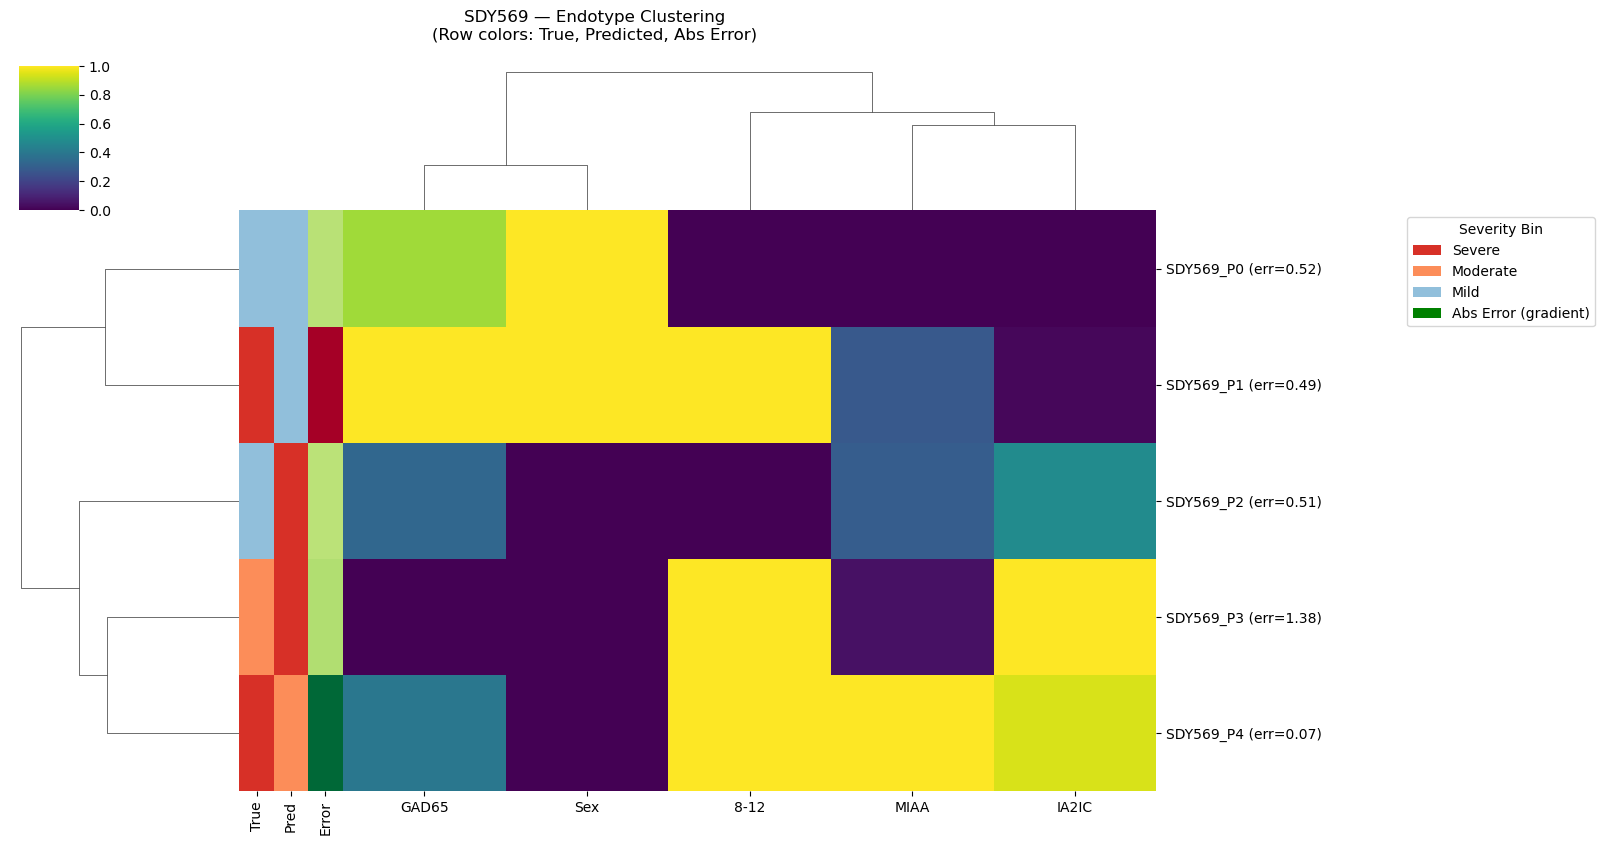

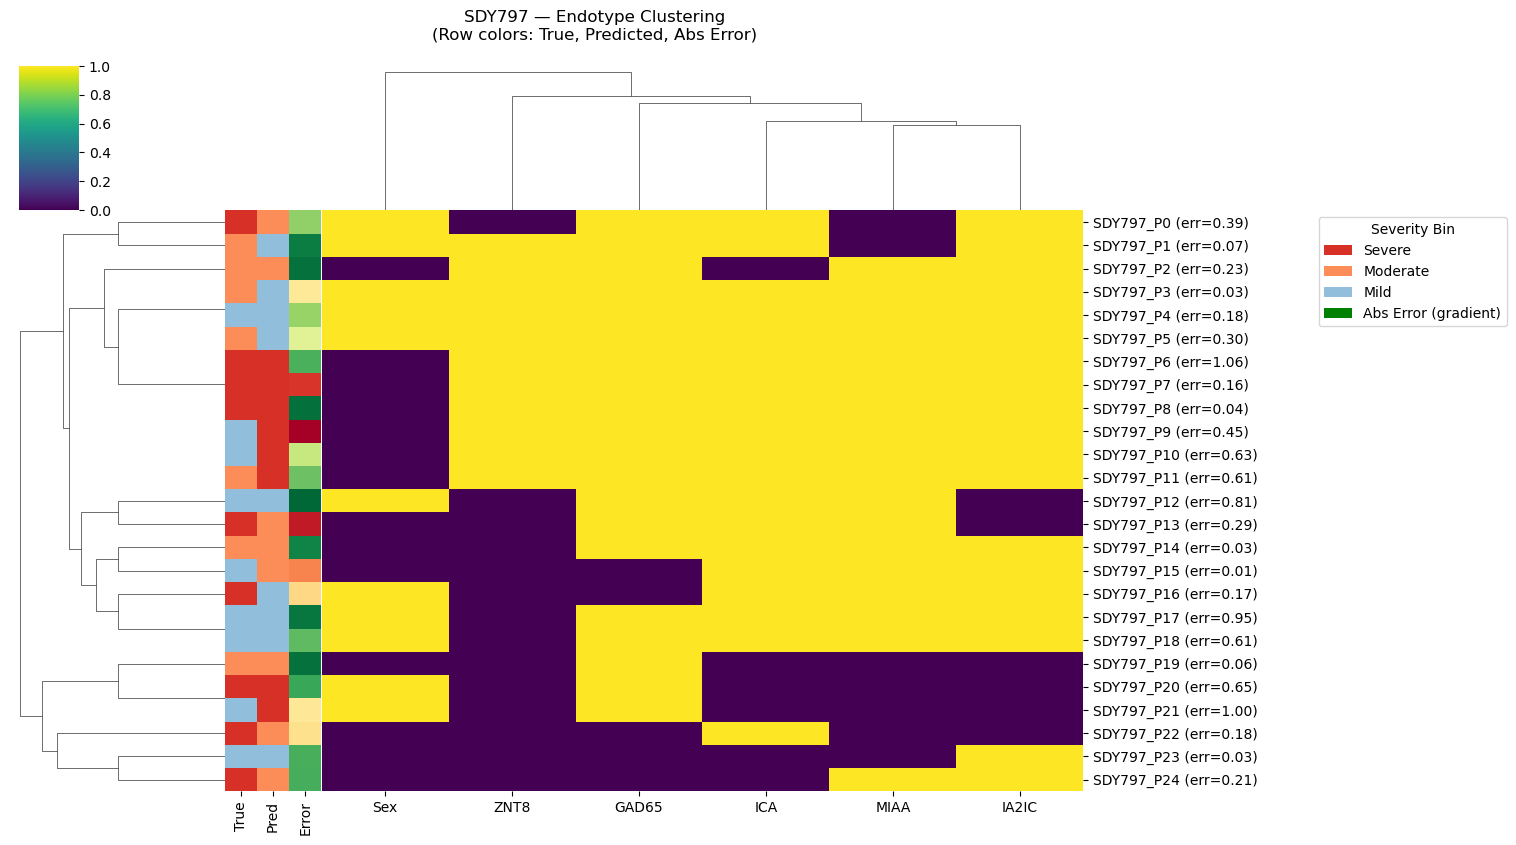

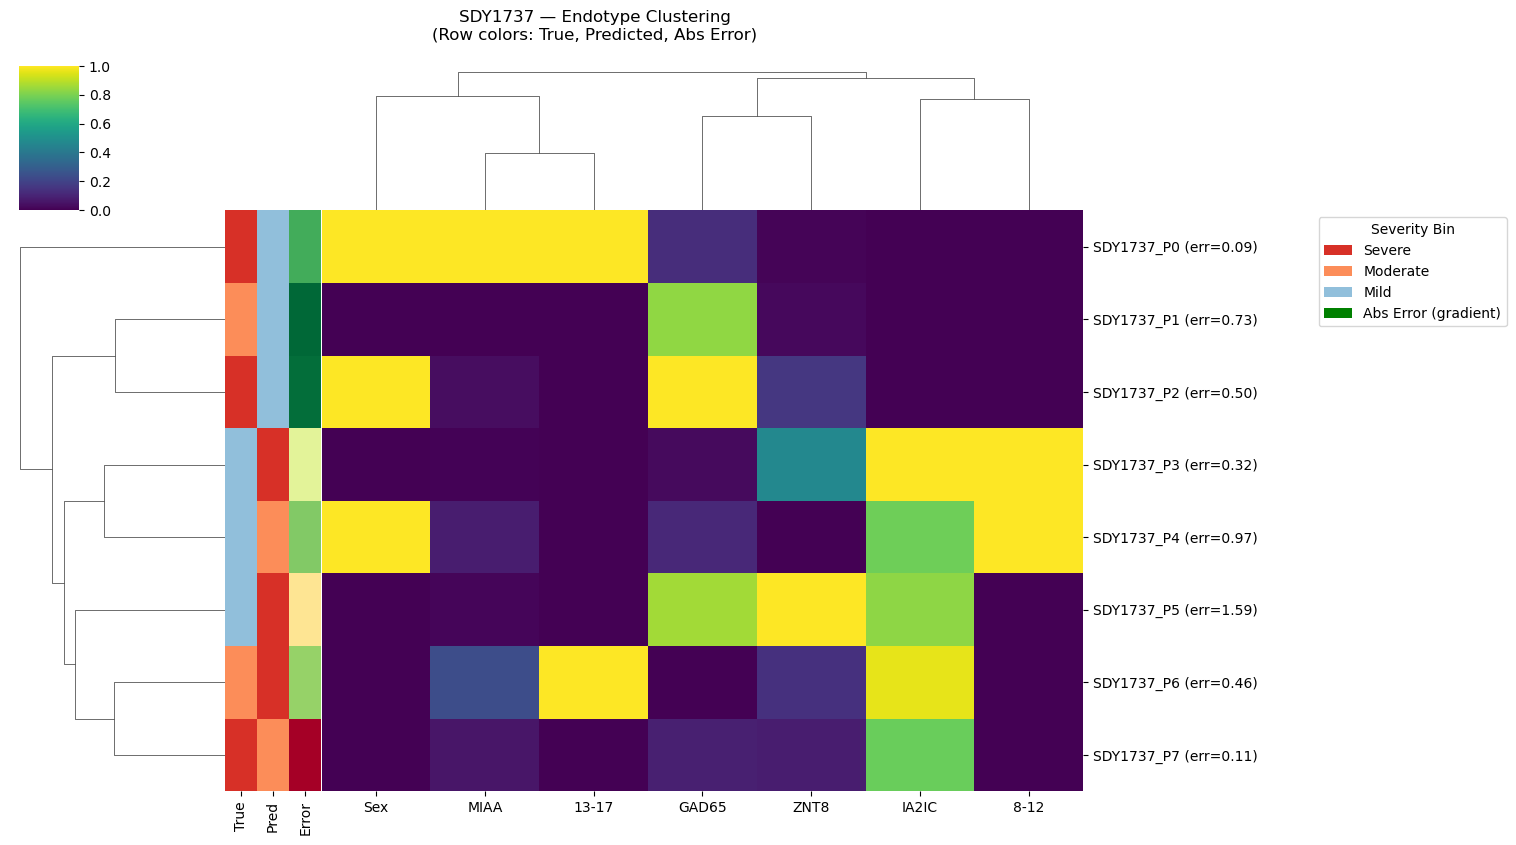

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.backends.backend_pdf import PdfPages

# Ensure output directories exist
os.makedirs("outputs/pdfs", exist_ok=True)
os.makedirs("outputs/html", exist_ok=True)

severity_colors = {
    "Severe": "#d73027",
    "Moderate": "#fc8d59",
    "Mild": "#91bfdb",
}

for study in studies:
    print(f"\n=== Generating heatmap for {study} ===")

    # --- Load model outputs ---
    result = rf_results[study]
    df = result["test_df"].copy()
    df["True_log_auc"] = result["y_test"]
    df["Pred_log_auc"] = result["y_pred"]
    df["AbsError"] = np.abs(df["True_log_auc"] - df["Pred_log_auc"])
    df.index = [f"{study}_P{i}" for i in range(len(df))]

    # --- Select features ---
    features = ["MIAA", "GAD65", "IA2IC", "ICA", "ZNT8", "8-12", "13-17", ">18", "Sex"]
    X = df[features].copy()

    for col in ["8-12", "13-17", ">18", "Sex"]:
        if col in X.columns:
            X[col] = X[col].astype(float)

    X = X.apply(pd.to_numeric, errors="coerce").fillna(0.0).replace([np.inf, -np.inf], 0.0)
    X = X.loc[:, X.var() > 0]

    # --- Binning severity ---
    df["SeverityTrueBin"] = pd.qcut(df["True_log_auc"], 3, labels=["Severe", "Moderate", "Mild"])
    df["SeverityPredBin"] = pd.qcut(df["Pred_log_auc"], 3, labels=["Severe", "Moderate", "Mild"])

    # --- Normalize error for coloring ---
    import matplotlib.colors as mcolors
    
    # Normalized error for color mapping
    norm_error = (df["AbsError"] - df["AbsError"].min()) / (df["AbsError"].max() - df["AbsError"].min())
    error_cmt = plt.cm.get_cmap("RdYlGn_r")  # green=low error, red=high error
    # Convert normalized values to hex color strings using the coolwarm colormap
#    error_colors = [mcolors.to_hex(c) for c in plt.cm.coolwarm(norm_error)]
    error_colors = [mcolors.to_hex(c) for c in error_cmt(norm_error)]

    # Assemble DataFrame with 3 color bands: True, Predicted, Error
    row_colors = pd.DataFrame({
        "True": df["SeverityTrueBin"].map(severity_colors),
        "Pred": df["SeverityPredBin"].map(severity_colors),
        "Error": error_colors
    }, index=df.index)
    
    
    # --- Row labels with error ---
    labels = [f"{idx} (err={err:.2f})" for idx, err in zip(df.index, df["AbsError"])]

    # --- Clustermap ---
    g = sns.clustermap(
        X,
        cmap="viridis",  # Updated to match your example
        row_colors=row_colors,
        figsize=(12, 8),
        col_cluster=True,
        row_cluster=True,
        standard_scale=1
    )

    g.ax_heatmap.set_yticklabels(labels, rotation=0)

    # --- Legend ---
    severity_patches = [Patch(facecolor=color, label=label) for label, color in severity_colors.items()]
    error_patch = Patch(facecolor='green', label="Abs Error (gradient)")

    g.ax_heatmap.legend(
        handles=severity_patches + [error_patch],
        title="Severity Bin",
        bbox_to_anchor=(1.3, 1),
        loc="upper left"
    )

    plt.suptitle(f"{study} — Endotype Clustering\n(Row colors: True, Predicted, Abs Error)", y=1.05)

    # --- Save as PDF ---
    pdf_path = f"outputs/pdfs/{study}_heatmap.pdf"
    with PdfPages(pdf_path) as pdf:
        pdf.savefig(g.fig, bbox_inches='tight')
    print(f"Saved PDF to {pdf_path}")

    # --- Optional: Save HTML placeholder ---
    from matplotlib.backends.backend_pdf import PdfPages
    import mpld3
    # Save interactive HTML
    with open(f"{study}_heatmap.html", "w") as f:
        f.write(mpld3.fig_to_html(g.fig))

